
Missing Values per Column:
 property_id                0
neighborhood               0
distance_to_city_center    0
distance_to_metro          0
distance_to_school         0
crime                      0
age                        0
total_area                 0
bedrooms                   0
bathrooms                  0
floors                     0
garage                     0
garden                     0
basement                   0
balcony                    0
construction_quality       0
renovation_status          0
heating_type               0
air_conditioning           0
parking_spaces             0
energy_efficiency          0
listing_duration           0
season_sold                0
year                       0
price                      0
dtype: int64
The number of duplicates : 
 0
The data type of the age column :  int64
Obtained Upper Bound : 
  50.5  
 Obtained Lower Bound : 
 -15.5

 Max Age :  100

 Min Age :  0


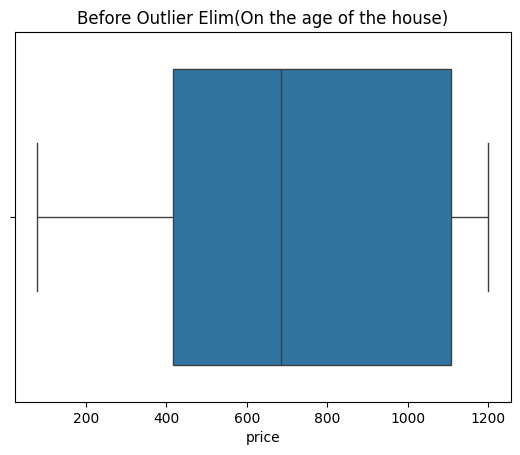

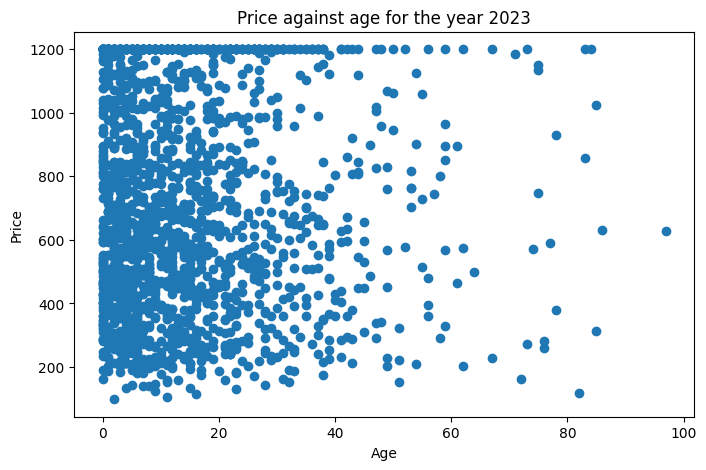

Outliers (On Price only) : 
 [0       True
1       True
2       True
3       True
4       True
        ... 
7995    True
7996    True
7997    True
7998    True
7999    True
Name: price, Length: 8000, dtype: bool]

Summary Statistics:
         property_id neighborhood  distance_to_city_center  distance_to_metro  \
count          8000         8000              8000.000000        8000.000000   
unique         8000           15                      NaN                NaN   
top     PROP_000001     Lakeside                      NaN                NaN   
freq              1          582                      NaN                NaN   
mean            NaN          NaN                 3.785213         337.536250   
std             NaN          NaN                 3.953137         350.469891   
min             NaN          NaN                 0.500000          50.000000   
25%             NaN          NaN                 1.000000          94.750000   
50%             NaN          NaN             

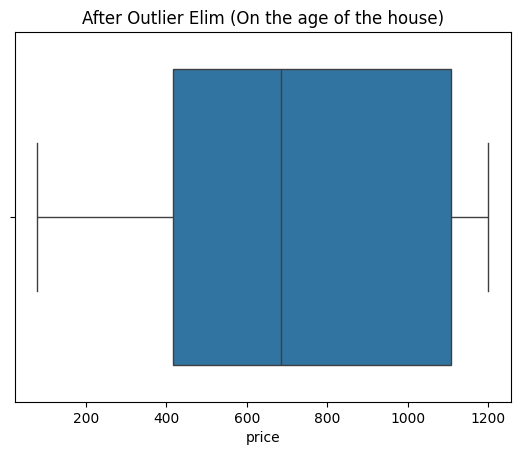

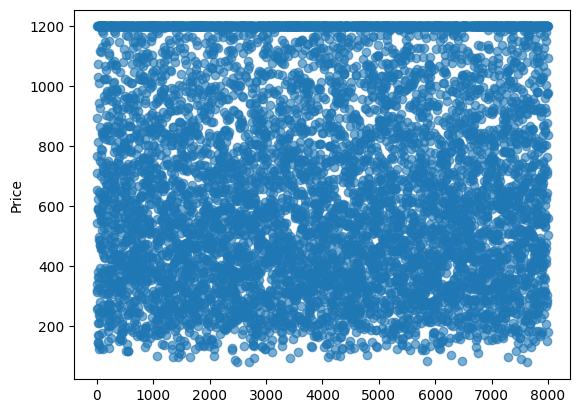

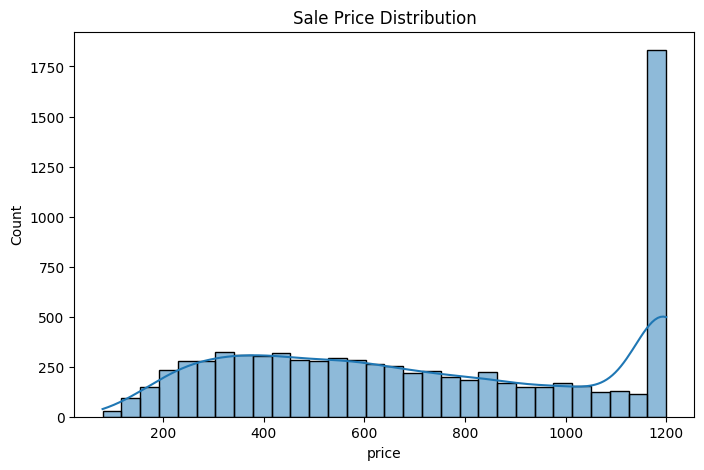

Skewness of sale_price: 0.07


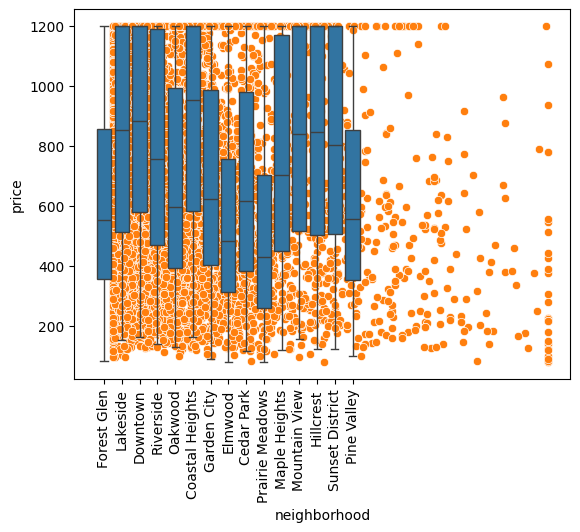

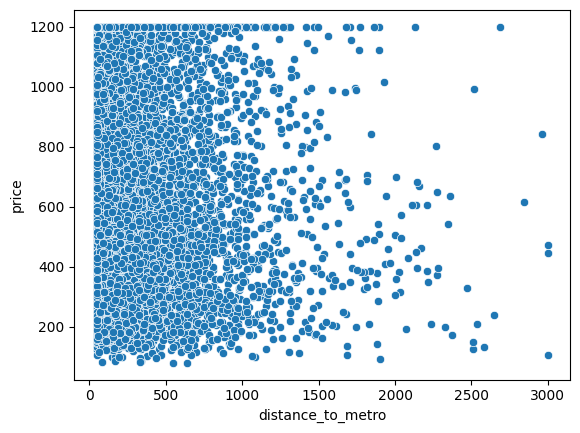

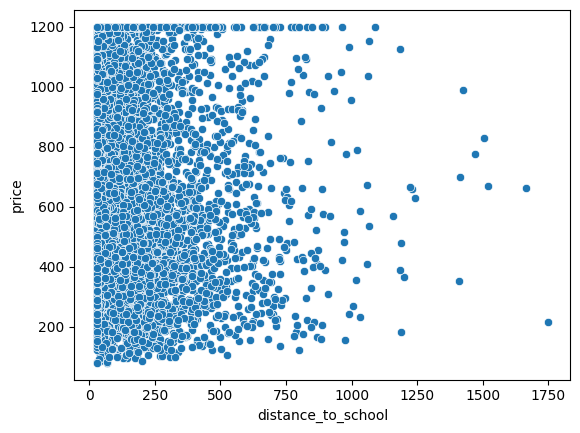

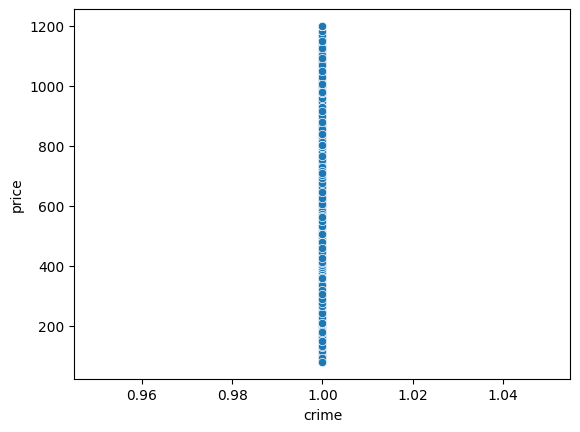

Root Mean Squared Error : 
 118.35385765190247

R2 Scores : 
 0.8843088744035518


ValueError: x and y must be the same size

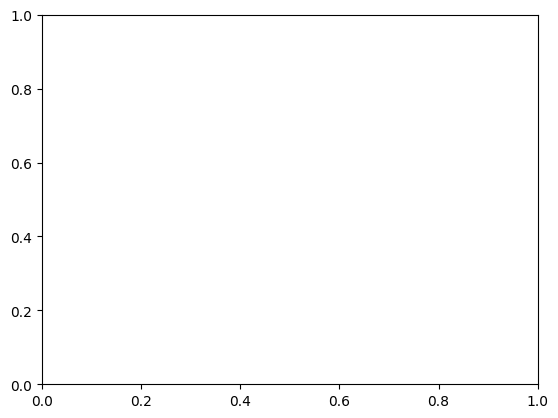

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

house_price = pd.read_csv('/home/nalin/Desktop/LABSML/ML_LAB1_Assignment/house_price_data.csv')
house_price.rename(columns = {'sale_price':'price', 'year_sold':'year','house_age':'age','crime_rate':'crime'},inplace = True)

#Task 1 :

#checking data quality, checking for nulls, duplicates and outliers.


print("\nMissing Values per Column:\n", house_price.isnull().sum())
print("The number of duplicates : \n",house_price.duplicated().sum())
house_price.drop_duplicates(inplace=True)
print("The data type of the age column : ",house_price['age'].dtype)
#removing outliers(based on the outliers in the 'Price' column)using Quartiles:
FirstQuartile = house_price['age'].quantile(0.1)
ThirdQuartile = house_price['age'].quantile(0.9)
interQuantileRange = ThirdQuartile - FirstQuartile 

#setting upper and Lower Bounds:

LowerBound = FirstQuartile - 0.5*interQuantileRange
UpperBound = ThirdQuartile + 0.5*interQuantileRange
print("Obtained Upper Bound : \n ", UpperBound, " \n Obtained Lower Bound : \n", LowerBound) 
#Before Eliminating Outliers : 
sns.boxplot(x = house_price['price'])
print("\n Max Age : ",max(house_price['age']))
print("\n Min Age : ", min(house_price['age']))
plt.title("Before Outlier Elim(On the age of the house)")
plt.show()

plt.figure(figsize=(8,5))
year2023 = house_price[house_price['year'] == 2023]
plt.scatter( data = year2023, x = 'age', y = 'price')
plt.title("Price against age for the year 2023")
plt.xlabel("Age")
plt.ylabel("Price")
plt.show()

outliers = [(house_price['price'] < LowerBound) | (house_price['price'] > UpperBound)]
print("Outliers (On Price only) : \n",outliers)

#eliminating the outliers
#house_price = house_price[(house_price['price'] >= LowerBound) & (house_price['price'] <= UpperBound)]

sns.boxplot(x = house_price['price'])



print("\nSummary Statistics:\n", house_price.describe(include='all'))

plt.title("After Outlier Elim (On the age of the house)")
plt.show()

plt.scatter(range(len(house_price['price'])),house_price['price'],alpha = 0.6)
plt.ylabel("Price")
plt.show()

#Task 2 : 
# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(house_price['price'], kde=True, bins=30)
plt.title("Sale Price Distribution")
plt.show()

# Skewness
price_skew = skew(house_price['price'], nan_policy='omit')
print(f"Skewness of sale_price: {price_skew:.2f}")

# Optional: Log transform if skewness > 1
import numpy as np
if abs(price_skew) > 1:
    house_price['log_sale_price'] = np.log1p(house_price['price'])
    plt.figure(figsize=(8,5))
    sns.histplot(house_price['log_sale_price'], kde=True, bins=30)
    plt.title("Log-Transformed Sale Price Distribution")
    plt.show()


#Location Impact Analysis:

sns.boxplot(x='neighborhood', y='price', data=house_price)
plt.xticks(rotation=90)

for col in ['distance_to_city_center', 'distance_to_metro', 'distance_to_school', 'crime']:
    sns.scatterplot(x=col, y='price', data=house_price)
    plt.show()

#Task 3:

#Creating Property Features:

#Price per Square Meter:

house_price['price_per_sqm'] = house_price['price'] / house_price['total_area']

#House Category:

house_price['Category by Age'] = pd.cut(house_price['age'], bins = [0,10,30,100], labels = ['New','Mid','Old'])

#Splitting the Dataset:

x = house_price.drop(columns = ['price','property_id'])
x = x.select_dtypes(include=['number'])

y = house_price['price']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

x_train = x_train.dropna()
y_train = y_train.loc[x_train.index]  # keep alignment

#Task 4:

#implementing Linear Regression

model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

MeanSquaredError = mean_squared_error(y_test,y_pred)
RootMeanSquaredError = np.sqrt(MeanSquaredError)
r2Score = r2_score(y_test,y_pred)

print("Root Mean Squared Error : \n", RootMeanSquaredError)
print("\nR2 Scores : \n", r2Score)

coefficients = house_price.__dataframe__({'Feature' : x_train.columns, 'Coefficients' : model.coef_})
print(coefficients)


#Printing the  best Fit Line:
x = house_price['year']
#plt.scatter(x,y_train,color = 'blue',label = 'Regression Line')
plt.plot(x,y_pred,color = 'red', linewidth = 2, label = 'best fit line')
plt.show()